In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.describe()
#some values are missing for bmi
#age values has decimals
#we need to do some data preprocessing

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
mean_value = data['bmi'].mean()
data['bmi'].fillna(value = mean_value, inplace = True)

In [ ]:
data['age'] = (data['age'].apply(np.ceil)).astype('int64')

In [ ]:
data.drop(data[data.gender == 'Other'].index, inplace = True)

In [ ]:
data.drop(data[data.smoking_status == 'Unknown'].index, inplace = True)

In [ ]:
data.tail(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5074,30379,0,52,0,0,1,0,1,104.00,25.600000,2,0
5076,39935,0,34,0,0,1,2,0,174.37,23.000000,1,0
5080,22691,0,29,0,0,1,3,1,90.52,28.000000,1,0
5081,37680,1,55,0,0,1,0,0,108.35,40.800000,0,0
5082,24552,0,44,0,0,1,2,0,72.03,37.500000,2,0
5084,29540,1,67,0,0,1,2,0,97.04,26.900000,2,0
5085,53525,0,72,0,0,1,2,1,83.89,33.100000,0,0
5087,26214,0,63,0,0,1,3,0,75.93,34.700000,0,0
5090,4211,1,26,0,0,0,0,0,100.85,21.000000,2,0
5091,6369,1,59,1,0,1,2,0,95.05,30.900000,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender'] = data[['gender']].apply(le.fit_transform)
data['ever_married'] = data[['ever_married']].apply(le.fit_transform)
data ['Residence_type'] = data[['Residence_type']].apply(le.fit_transform)
data['work_type'] = data[['work_type']].apply(le.fit_transform)
data ['smoking_status'] = data[['smoking_status']].apply(le.fit_transform)

In [ ]:
data.tail(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5074,30379,0,52,0,0,1,0,1,104.00,25.600000,2,0
5076,39935,0,34,0,0,1,2,0,174.37,23.000000,1,0
5080,22691,0,29,0,0,1,3,1,90.52,28.000000,1,0
5081,37680,1,55,0,0,1,0,0,108.35,40.800000,0,0
5082,24552,0,44,0,0,1,2,0,72.03,37.500000,2,0
5084,29540,1,67,0,0,1,2,0,97.04,26.900000,2,0
5085,53525,0,72,0,0,1,2,1,83.89,33.100000,0,0
5087,26214,0,63,0,0,1,3,0,75.93,34.700000,0,0
5090,4211,1,26,0,0,0,0,0,100.85,21.000000,2,0
5091,6369,1,59,1,0,1,2,0,95.05,30.900000,1,0


In [ ]:
data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000
mean,36780.317251,0.394670,48.860309,0.125105,0.063955,0.760168,1.920617,0.508836,108.972376,30.237406,0.973352,0.056662
std,21240.500438,0.488848,18.873140,0.330885,0.244707,0.427041,0.928193,0.499992,48.295550,7.156210,0.684621,0.231228
min,67.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,18040.000000,0.000000,34.000000,0.000000,0.000000,1.000000,2.000000,0.000000,77.460000,25.400000,1.000000,0.000000
50%,37446.000000,0.000000,50.000000,0.000000,0.000000,1.000000,2.000000,1.000000,92.650000,28.893237,1.000000,0.000000
75%,54946.000000,1.000000,63.000000,0.000000,0.000000,1.000000,2.000000,1.000000,116.670000,33.800000,1.000000,0.000000
max,72915.000000,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,2.000000,1.000000


number with stroke:  202
number without stroke:  3363




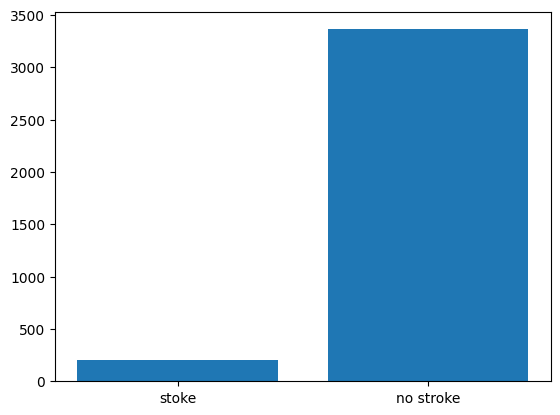

In [ ]:
#Split the data into those with stroke and without stroke
no_stroke = data[data['stroke'] == 0] #extract the information of those without stroke
no_stroke_extract = no_stroke['stroke'] #extract one column

yes_stroke = data[data['stroke'] == 1] #extract the information of those with stroke
yes_stroke_extract = yes_stroke['stroke'] #extract one column

count = [yes_stroke_extract.count(), no_stroke_extract.count()]
labels = ('stoke', 'no stroke')

#plot stroke vs no stroke observations
plt.bar(labels, count)
print ("number with stroke: ",yes_stroke_extract.count())
print ("number without stroke: ",no_stroke_extract.count())
print ("\n")

ValueError: ignored

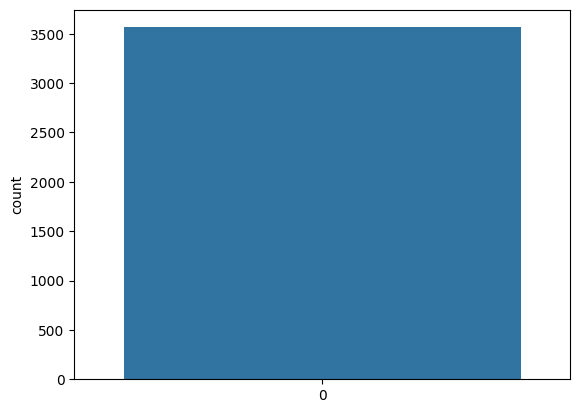

In [ ]:
#same plot as above: Using seaborn to visualize stroke vs no stroke observations
import seaborn as sns
g = sns.countplot(data['stroke'])
g.set_xticklabels(['no stroke','stroke'])
plt.show()

ValueError: ignored

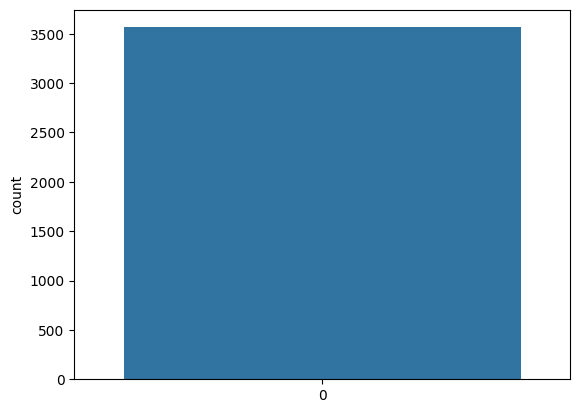

In [ ]:
#same plot as above: Using seaborn to visualize stroke vs no stroke observations
import seaborn as sns
g = sns.countplot(data['stroke'])
g.set_xticklabels(['no stroke','stroke'])
plt.show()

ValueError: ignored

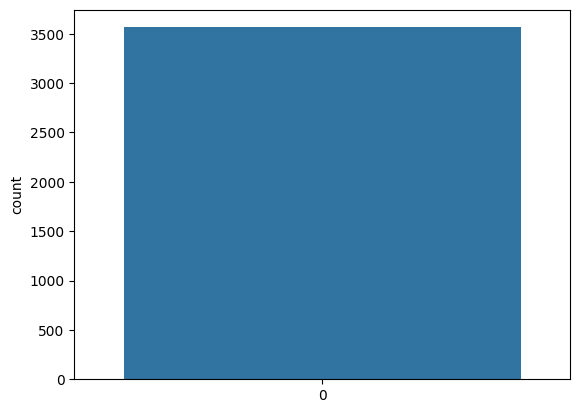

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.countplot(data['stroke'])
g.set_xticklabels(['No Stroke', 'Stroke'])
plt.show()


In [ ]:
yes_stroke.describe() #observations with stroke
#minimum age is 32

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.0
mean,36561.559406,0.425743,68.168317,0.306931,0.193069,0.896040,2.034653,0.524752,134.344653,30.460155,0.861386,1.0
std,22107.825562,0.495684,11.768555,0.462366,0.395688,0.305967,0.883113,0.500628,62.993827,5.982315,0.733420,0.0
min,210.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.110000,16.900000,0.000000,1.0
25%,16646.750000,0.000000,59.000000,0.000000,0.000000,1.000000,2.000000,0.000000,79.875000,27.025000,0.000000,1.0
50%,36522.000000,0.000000,71.000000,0.000000,0.000000,1.000000,2.000000,1.000000,106.575000,28.896618,1.000000,1.0
75%,56437.500000,1.000000,78.000000,1.000000,0.000000,1.000000,3.000000,1.000000,196.867500,32.975000,1.000000,1.0
max,72081.000000,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,56.600000,2.000000,1.0


In [ ]:
no_stroke.describe() #observations without stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.0
mean,36793.457032,0.392804,47.700565,0.114184,0.056200,0.752007,1.913767,0.507880,107.448379,30.224027,0.980077,0.0
std,21190.616570,0.488446,18.589570,0.318082,0.230341,0.431912,0.930511,0.500012,46.843959,7.221185,0.681109,0.0
min,67.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.0
25%,18160.500000,0.000000,33.000000,0.000000,0.000000,1.000000,2.000000,0.000000,77.325000,25.300000,1.000000,0.0
50%,37507.000000,0.000000,48.000000,0.000000,0.000000,1.000000,2.000000,1.000000,92.060000,28.893237,1.000000,0.0
75%,54863.500000,1.000000,62.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.520000,33.900000,1.000000,0.0
max,72915.000000,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,267.760000,92.000000,2.000000,0.0


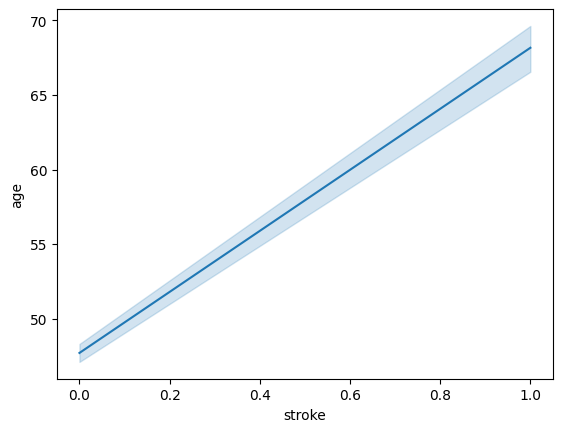

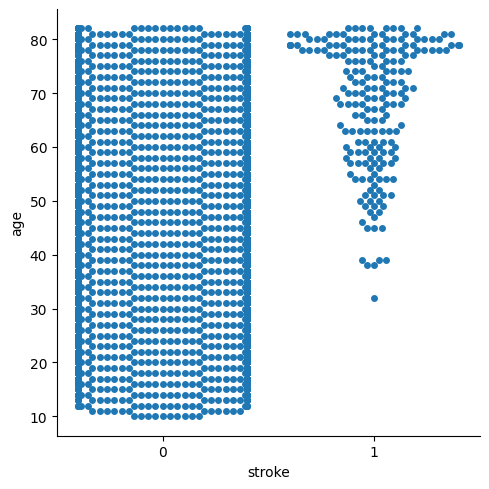

In [ ]:
#Stroke chances increases with age, starting from age 32
sns.lineplot(data=data, x="stroke", y="age")
sns.catplot(data=data, kind = "swarm", x="stroke", y="age")

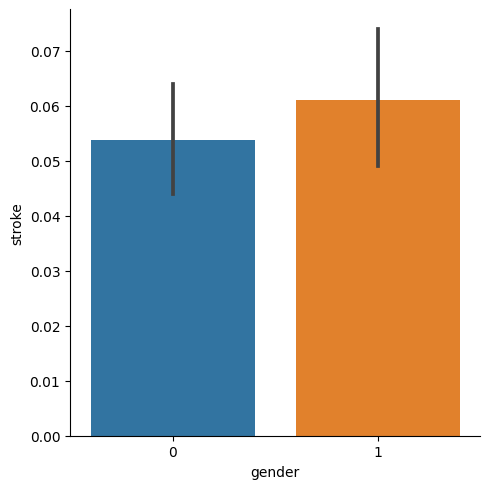

In [ ]:
#The dataset have a good gender distribution
sns.catplot(data=data, kind="bar", x="gender", y="stroke")

<Axes: xlabel='stroke', ylabel='bmi'>

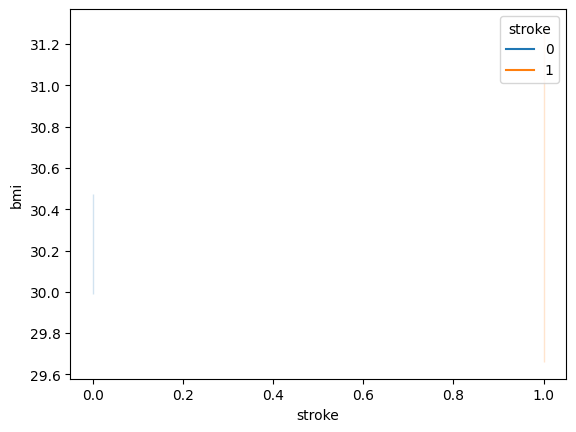

In [ ]:
#bmi, stroke
#plot shows that people with stroke have higher bmi values

sns.lineplot(data=data, x="stroke", y="bmi", hue="stroke")

<Axes: xlabel='bmi', ylabel='heart_disease'>

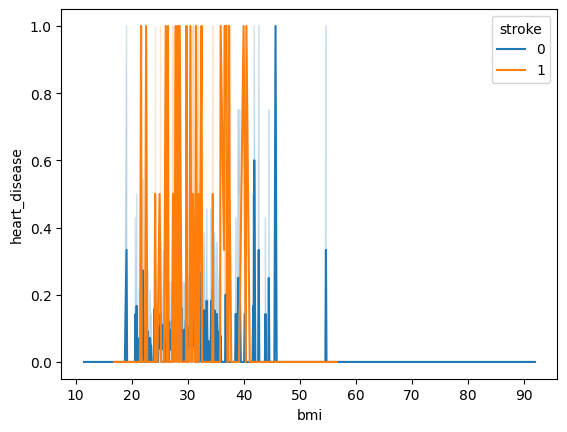

In [ ]:
#line plot for stroke, bmi vs heart diesase
sns.lineplot(data=data, x="bmi", y="heart_disease", hue='stroke')

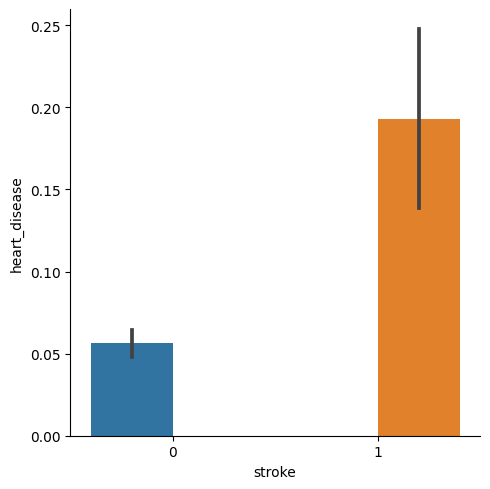

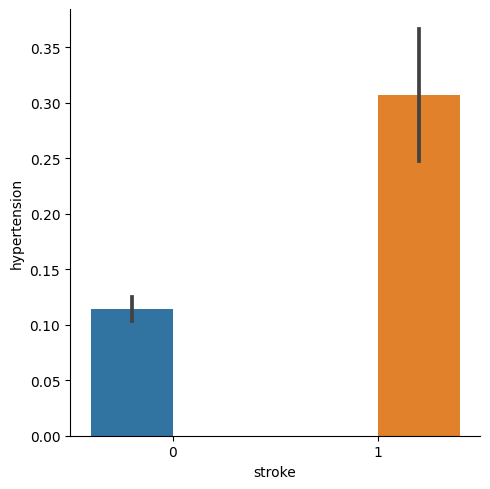

In [ ]:
#hypertension and heart disease increases the risk of an individual having a stroke
sns.catplot(data=data, kind="bar", x="stroke", y="heart_disease", hue="stroke") #heart disease vs stroke
sns.catplot(data=data, kind="bar", x="stroke", y="hypertension", hue="stroke") #hypertension vs stroke
